<b> One-Layer Atmosphere Model </b><br>
Reference: Walter A. Robinson, Modeling Dynamic Climate Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-dark")

In [2]:
# Step size
dt = 0.01

# Set up a 10 years simulation
tmin = 0
tmax = 10
t = np.arange(tmin, tmax + dt, dt)
n = len(t)

# Seconds per year
seconds_per_year = 365 * 24 * 60 * 60

In [3]:
# Albedo
albedo = 0.3

# Emissivity
e = 0.85

# Atmospheric Absorption
atmospheric_abs = 0.1

# Stefan-Boltzmann constant
sigma = 5.6696e-8 # W/m^2*K^4

# Solar constant 
solar_const = 1367 # W/m^2

# Density of water
water_density = 1000 # kg/m^3

# Depth of the mixed layer
depth_mixed_layer = 50 # m

# Specific heat capacity of water
spec_heat_water = 4218 # J/kg*K

# Specific heat capacity of atmosphere
spec_heat_atm = 1004 # J/kg*K

# Gravity accelleration
g = 9.81 # m/s^2

# Atmospheric pressure
atm_press = 1e5; # Pa (kg/m * s^2)

# Atmospheric mass
mass_atm = atm_press/g;  # kg/m^2

In [4]:
# Heat capacity water
heat_capacity_water = water_density * depth_mixed_layer * spec_heat_water

# Heat capacity atmosphere
heat_capacity_atm = mass_atm * spec_heat_atm;

In [5]:
# Initialize temperature
ts = np.zeros((n,)) # Surface temperature
ts[0] = 273.15

ta = np.zeros((n,)) # Atmospheric temperature
ta[0] = 273.15

In [6]:
# Inflows (Solar to earth, IR down) - Surface

# Absorbed solar energy
solar = solar_const/4 * (1 - albedo) * seconds_per_year

# Solar to earth
solar_to_earth = solar * (1 - atmospheric_abs)

# IR Down
ir_down = sigma * e * ta[0] ** 4 * seconds_per_year

# Outflows (IR) - Surface
ir = sigma * ts[0] ** 4 * seconds_per_year

In [7]:
# Inflows (solar to atmosphere, IR) - Atmosphere

# Solar to atmosphere
solar_to_atm = solar * atmospheric_abs

# Outflows (IR down, IR to space) - Atmosphere

# IR to space
ir_to_space = ir * (1 - e) + ir_down

In [8]:
# Flows of energy

# IR norm
ir_norm = np.zeros((n, ))
ir_norm[0] = ir/seconds_per_year

# IR down norm
ir_down_norm = np.zeros((n, ))
ir_down_norm[0] = ir_down/seconds_per_year

# Solar to earth norm
solar_to_earth_norm = np.zeros((n, ))
solar_to_earth_norm[0] = solar_to_earth/seconds_per_year

In [9]:
for k in range(1, n):
     
    # Inflows (Solar to earth, IR down) - Surface
    solar_to_earth = (solar_const/4 * (1 - albedo) * seconds_per_year) * (1 - atmospheric_abs)
    ir_down = sigma * e * ta[k-1] ** 4 * seconds_per_year
    
    # Outflows (IR) - Surface
    ir = sigma * ts[k-1] ** 4 * seconds_per_year
    
    # Calculate the temperature - Surface
    energy_ts = ts[k-1] * heat_capacity_water + (solar_to_earth + ir_down - ir) * dt
    ts[k] = energy_ts/heat_capacity_water
    
    # Inflows (solar to atmosphere, IR) - Atmosphere
    solar_to_atm = (solar_const/4 * (1 - albedo) * seconds_per_year) * atmospheric_abs
    
    # Outflows (IR down, IR to space) - Atmosphere
    ir_to_space = ir * (1 - e) + ir_down
    
    # Calculate the temperature - Atmosphere
    energy_ta = ta[k-1] * heat_capacity_atm + (ir + solar_to_atm - ir_down - ir_to_space) * dt
    ta[k] = energy_ta/heat_capacity_atm
    
    # Calculate IR norm, IR down, Solar to earth norm
    ir_norm[k] = ir/seconds_per_year
    ir_down_norm[k] = ir_down/seconds_per_year
    solar_to_earth_norm[k] = solar_to_earth/seconds_per_year
    

In [10]:
# Convert to °C
ts = ts - 273.15
ta = ta - 273.15

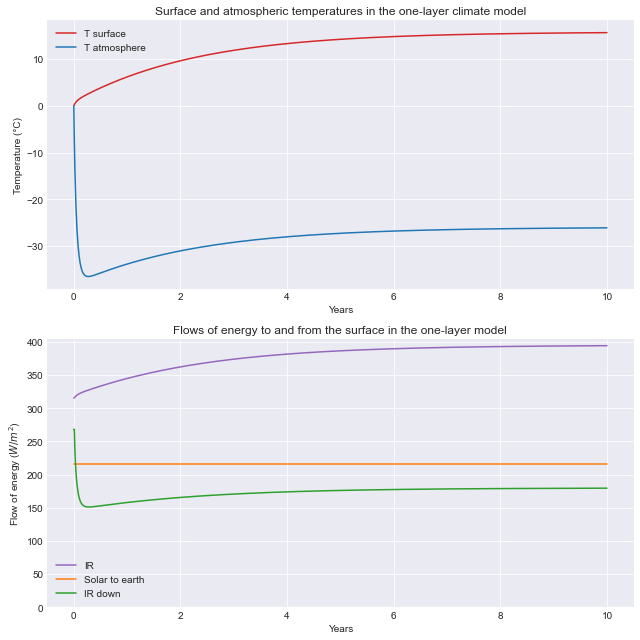

In [11]:
# Plot Ts and Ta
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (9, 9))
ax1.set_xlabel("Years")
ax1.set_ylabel("Temperature (°C)")
ax1.set_title("Surface and atmospheric temperatures in the one-layer climate model")
ax1.plot(t, ts, c="tab:red")
ax1.plot(t, ta, c="tab:blue")
ax1.legend(("T surface","T atmosphere"))
ax1.grid()

# Plot the Flows
ax2.set_xlabel("Years")
ax2.set_ylabel("Flow of energy ($W/m^{2}$)")
ax2.set_title("Flows of energy to and from the surface in the one-layer model")
ax2.set_ylim(0, ir_norm.max() + 10)
ax2.plot(t, ir_norm, c="tab:purple")
ax2.plot(t, solar_to_earth_norm, c="tab:orange")
ax2.plot(t, ir_down_norm, c="tab:green")
ax2.grid()
ax2.legend(("IR", "Solar to earth", "IR down"))

plt.tight_layout()
plt.show()